In [55]:
import healsparse as hsp
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import numpy.ma as ma
import pandas as pd
import GCRCatalogs
import math

In [ ]:
#print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))
print('\n'.join(sorted(GCRCatalogs.get_available_catalogs(include_default_only=False))))

In [3]:
gc = GCRCatalogs.load_catalog('dc2_object_run2.2i_dr6')

In [7]:
print(', '.join(sorted(gc.list_all_quantities())))

I_flag, I_flag_g, I_flag_i, I_flag_r, I_flag_u, I_flag_y, I_flag_z, IxxPSF_pixel, IxxPSF_pixel_g, IxxPSF_pixel_i, IxxPSF_pixel_r, IxxPSF_pixel_u, IxxPSF_pixel_y, IxxPSF_pixel_z, Ixx_pixel, Ixx_pixel_g, Ixx_pixel_i, Ixx_pixel_r, Ixx_pixel_u, Ixx_pixel_y, Ixx_pixel_z, IxyPSF_pixel, IxyPSF_pixel_g, IxyPSF_pixel_i, IxyPSF_pixel_r, IxyPSF_pixel_u, IxyPSF_pixel_y, IxyPSF_pixel_z, Ixy_pixel, Ixy_pixel_g, Ixy_pixel_i, Ixy_pixel_r, Ixy_pixel_u, Ixy_pixel_y, Ixy_pixel_z, IyyPSF_pixel, IyyPSF_pixel_g, IyyPSF_pixel_i, IyyPSF_pixel_r, IyyPSF_pixel_u, IyyPSF_pixel_y, IyyPSF_pixel_z, Iyy_pixel, Iyy_pixel_g, Iyy_pixel_i, Iyy_pixel_r, Iyy_pixel_u, Iyy_pixel_y, Iyy_pixel_z, blendedness, cModelFluxErr_g, cModelFluxErr_i, cModelFluxErr_r, cModelFluxErr_u, cModelFluxErr_y, cModelFluxErr_z, cModelFlux_flag_g, cModelFlux_flag_i, cModelFlux_flag_r, cModelFlux_flag_u, cModelFlux_flag_y, cModelFlux_flag_z, cModelFlux_g, cModelFlux_i, cModelFlux_r, cModelFlux_u, cModelFlux_y, cModelFlux_z, clean, dec, extendedne

In [ ]:
data = gc.get_quantities(["clean", "good", "extendedness", 'ra', 'dec'], filters=['(ra >= 60.1) & (ra<=60.2)', '(dec>=-36.40) & (dec<=-36.3)', 'extendedness != 0.0']) # maybe add some filters to avoid filling out the memory at once.


In [3]:
dirDpdd =  '/sps/lsst/groups/desc/shared/DC2-prod/Run2.2i/dpdd/Run2.2i-dr6/object_dpdd_only/'
fileDpdd = dirDpdd +  f"object_dpdd_tract{str(3830)}.parquet"
columns = ["objectId", "ra", "dec", "clean", "good", "extendedness","mag_i_cModel"]
f3 = pd.read_parquet(fileDpdd, columns=columns, engine='pyarrow')
clean = f3["clean"]
good = f3["good"]
extend = f3["extendedness"]
objectId = f3["objectId"]
mag_i_cModel = f3["mag_i_cModel"]

In [ ]:
f1 = h5py.File(f'/sps/lsst/groups/desc/PZ/PhotoZDC2/run2.2i_dr6_v2/CATALOGS_W_TRUTH/Run2.2i_dr6_dereddened_tract_{str(3830)}_withtruez.hdf5', 'r')
f1.visit(get_all)
galaxy_id = f1['photometry/id']
ra = f1['photometry/ra']
dec = f1['photometry/dec']

In [6]:
len(f3)

1119121

In [122]:
gals = f3[(f3["extendedness"]>.5)&(f3["clean"]==True)&(np.isfinite(f3["mag_i_cModel"]))]
stars = f3[f3["extendedness"]<.5]
n_extd= f3[(f3["extendedness"]!=0)&(f3["extendedness"]!=1)]

In [32]:
n_extd_m = n_extd[(n_extd["mag_i_cModel"]>1)&(n_extd["mag_i_cModel"]<40)]

In [33]:
n_extd_m

,objectId,ra,dec,clean,good,extendedness,mag_i_cModel
3718,16844518137556192,61.141533,-37.190017,True,True,NaN,26.704518
3812,16844518137556405,61.118869,-37.189730,True,True,NaN,25.824297
3817,16844518137556411,61.113765,-37.188432,True,True,NaN,24.832101
4266,16844518137557011,61.060104,-37.184008,True,True,NaN,25.836757
4274,16844518137557019,61.007529,-37.183497,True,True,NaN,26.606904
...,...,...,...,...,...,...,...
1117611,16845368541092786,59.514930,-35.719463,True,True,NaN,26.082353
1118159,16845368541093496,59.500173,-35.710811,True,True,NaN,27.521978
1118216,16845368541093559,59.509397,-35.711928,True,True,NaN,26.086881
1118230,16845368541093573,59.532940,-35.710914,True,True,NaN,25.959701


(array([1.000e+00, 7.300e+01, 8.310e+02, 2.783e+03, 3.105e+03, 3.170e+02,
        5.700e+01, 1.900e+01, 3.000e+00, 1.000e+00]),
 array([19.00825264, 20.77448163, 22.54071062, 24.30693961, 26.07316861,
        27.8393976 , 29.60562659, 31.37185559, 33.13808458, 34.90431357,
        36.67054257]),
 <BarContainer object of 10 artists>)

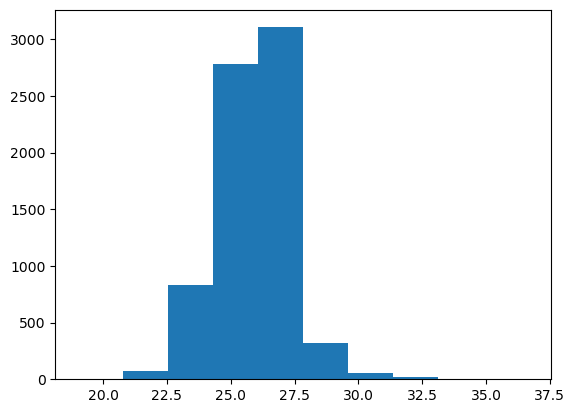

In [98]:
plt.hist(n_extd_m["mag_i_cModel"])

(-36.4, -36.1)

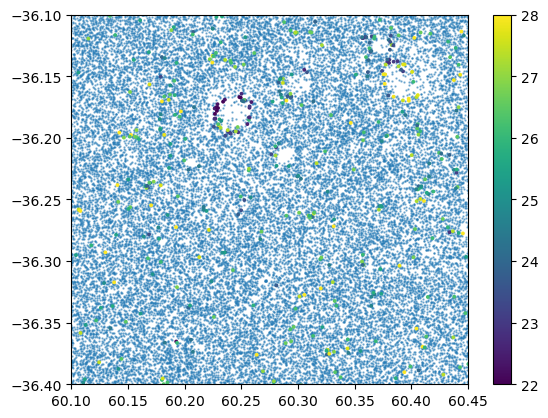

In [37]:
plt.scatter(gals['ra'], gals['dec'], s= .5, alpha = .5)
plt.scatter(n_extd_m['ra'], n_extd_m['dec'], s= 3, alpha = 1, c = n_extd_m["mag_i_cModel"],vmin = 22, vmax = 28)
plt.colorbar()
plt.xlim([60.10,60.45])
plt.ylim([-36.40,-36.10])

In [61]:
n_extd_nm = n_extd[np.isnan(n_extd["mag_i_cModel"])]

In [84]:
n_extd_nm_cl = n_extd_nm[n_extd_nm["good"]==False]

In [85]:
n_extd_nm_cl

,objectId,ra,dec,clean,good,extendedness,mag_i_cModel
9904,16844518137564538,61.133730,-37.094430,False,False,NaN,NaN
9905,16844518137564539,61.133948,-37.093858,False,False,NaN,NaN
9906,16844518137564540,61.134193,-37.094380,False,False,NaN,NaN
9907,16844518137564541,61.134779,-37.094054,False,False,NaN,NaN
9908,16844518137564542,61.134688,-37.093956,False,False,NaN,NaN
...,...,...,...,...,...,...,...
1112802,16845368541086774,59.559112,-35.790914,False,False,NaN,NaN
1112803,16845368541086775,59.558352,-35.791044,False,False,NaN,NaN
1112804,16845368541086776,59.558894,-35.791524,False,False,NaN,NaN
1112805,16845368541086777,59.558384,-35.791454,False,False,NaN,NaN


(-36.4, -36.1)

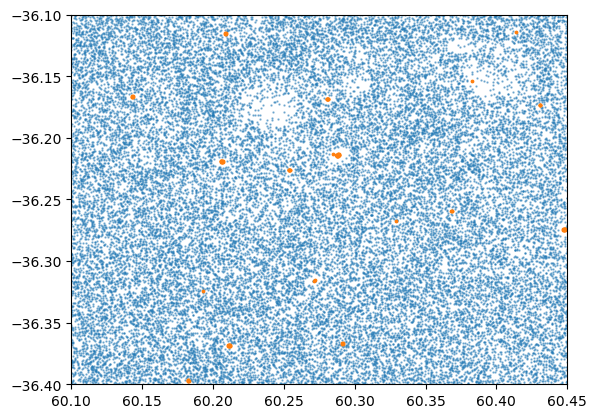

In [97]:
plt.scatter(gals['ra'], gals['dec'], s= .5, alpha = .5)
plt.scatter(n_extd_nm_cl['ra'], n_extd_nm_cl['dec'], s= 3, alpha = 1)
plt.xlim([60.10,60.45])
plt.ylim([-36.40,-36.10])

In [99]:
mask

NameError: name 'mask' is not defined

In [151]:
filename = "/sps/lsst/groups/desc/shared/DC2-prod/Run2.2i/addons/supreme/dr6/supreme_dc2_dr6d_v3_r_coadd_mask_or.hs"

In [152]:
mask = hsp.HealSparseMap.read(filename)

In [153]:
nside_sparse = mask._nside_sparse

In [106]:
t = Table.from_pandas(f3)

In [107]:
t

objectId,ra,dec,clean,good,extendedness,mag_i_cModel
int64,float64,float64,bool,bool,float64,float64
16844518137529852,61.15097218119344,-37.18991297922315,True,True,1.0,23.133443925168358
16844518137529857,61.21523195959068,-37.189864452057755,True,True,0.0,26.21306295817054
16844518137529858,61.20153252001775,-37.18985972292733,True,True,1.0,25.839563684540543
16844518137529875,61.1119169958291,-37.18983185076904,True,True,1.0,24.81546137072045
16844518137529881,61.155104296388124,-37.189618178985874,True,True,1.0,25.69231168163715
16844518137529892,61.04275857394543,-37.19000288895217,True,True,1.0,22.480805020172788
16844518137529896,61.16002824863397,-37.18948387658814,True,True,1.0,26.141111904343315
16844518137529899,61.10830060331914,-37.189747328005275,True,True,1.0,25.804723139732406
16844518137529914,61.13260893812263,-37.18915642250367,True,True,0.0,26.067069925179887


In [161]:
ipx_data = hp.ang2pix(nside_sparse, gals_t['ra'], gals_t['dec'], lonlat=True)

In [162]:
good_galaxies = mask[ipx_data]

In [163]:
len(good_galaxies)

850368

In [164]:
good_galaxies_ra, good_galaxies_dec = hp.pix2ang(nside_sparse, good_galaxies, lonlat=True)

In [165]:
good_galaxies

array([-2147483648, -2147483648, -2147483648, ..., -2147483648,
       -2147483648, -2147483648], dtype=int32)

In [166]:
min(good_galaxies)

-2147483648

In [167]:
max(good_galaxies)

-2147483648

In [160]:
gals_t = t[(t["extendedness"]>.5)&(t["clean"]==True)&(np.isfinite(t["mag_i_cModel"]))]

(-36.4, -36.1)

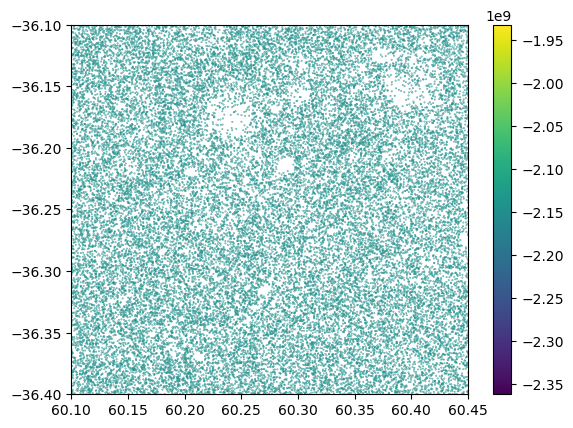

In [168]:
plt.scatter(gals_t['ra'], gals_t['dec'], s=.1, c=good_galaxies)
plt.colorbar()
plt.xlim([60.10,60.45])
plt.ylim([-36.40,-36.10])

(-36.4, -36.1)

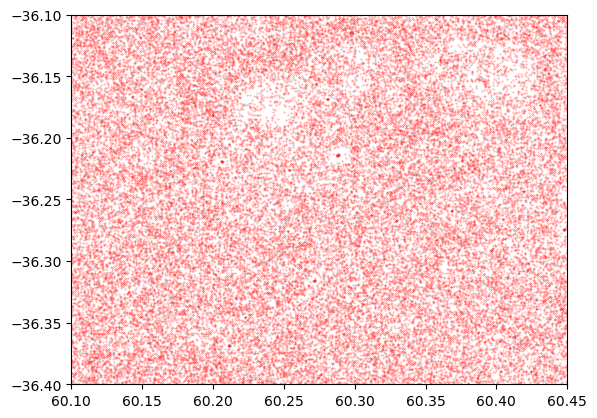

In [149]:
plt.scatter(f3['ra'], f3['dec'], s=.1, alpha = .5, color = 'red')
plt.xlim([60.10,60.45])
plt.ylim([-36.40,-36.10])

In [21]:
mask

HealSparseMap: nside_coverage = 32, nside_sparse = 32768, int32

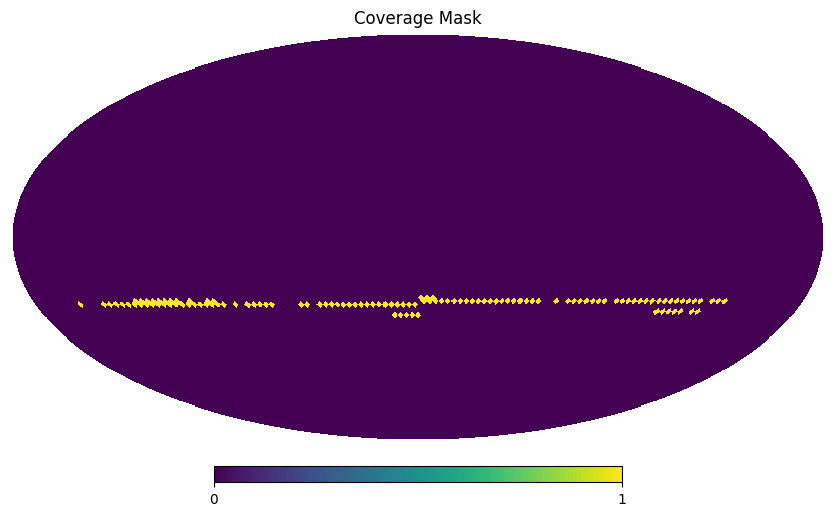

In [5]:
hsp_mask = mask.coverage_mask
hp.mollview(hsp_mask, title='Coverage Mask')

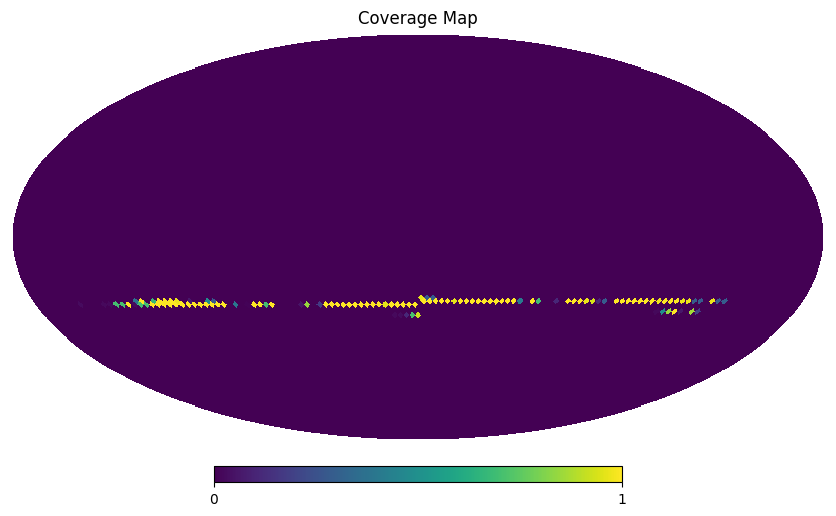

In [6]:
hsp_cov_map = mask.coverage_map
hp.mollview(hsp_cov_map, title='Coverage Map')

In [7]:
valid_pixels_indices = mask.valid_pixels
print(valid_pixels_indices)

[8922726253 8922726255 8922726262 ... 9466587809 9466587810 9466587811]


In [5]:
#print(mask.get_values_pos(np.linspace(60.1,60.45,10000), np.linspace(-36.40,-36.10,10000), lonlat=True))

[36896 36896 36896 ... 36896 36896 36896]


In [22]:
ra_b, dec_b = np.linspace(60.1,60.45,1000), np.linspace(-36.40,-36.10,1000)
ra_v,dec_v = np.meshgrid(ra_b, dec_b)
vpix_b = mask.get_values_pos(ra_v,dec_v, lonlat=True)

In [6]:
vpix_b

array([[36896, 36896, 36896, ..., 36896, 36896, 36896],
       [36896, 36896, 36896, ..., 36896, 36896, 36896],
       [36896, 36896, 36896, ..., 36896, 36896, 36896],
       ...,
       [36864, 36864, 36864, ..., 36896, 36896, 36896],
       [   44, 36864, 36864, ..., 36896, 36896, 36896],
       [   44,    44, 36864, ..., 36896, 36896, 36896]], dtype=int32)

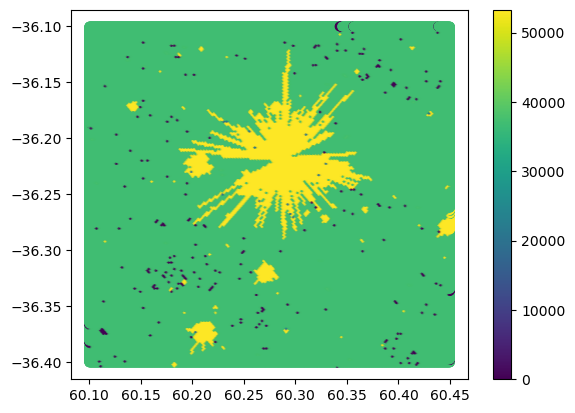

In [23]:
plt.scatter(ra_v, dec_v, c=vpix_b)
plt.colorbar()
#plt.xlim([60.45,60.10])
#plt.ylim([-36.40,-36.10])
plt.show()

In [9]:
mask[0]

-2147483648

In [10]:
vpix[0]

8922726253

In [8]:
nside_sparse = mask._nside_sparse
#nside_coverage = mask._nside_coverage

In [9]:
nside_sparse

32768

In [8]:
vpix, ra, dec = mask.valid_pixels_pos(return_pixels=True)

In [11]:
val_min = 30000000
val_max = 40000000

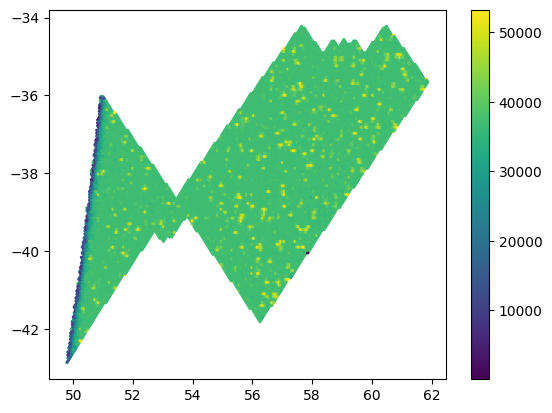

In [12]:
plt.hexbin(ra[val_min:val_max], dec[val_min:val_max], C=mask[vpix[val_min:val_max]], gridsize=200)
plt.colorbar()
#plt.xlim([60.45,60.10])
#plt.ylim([-36.40,-36.10])
plt.show()

In [12]:
ra_box = ra[(ra<60.45) * (ra>60.35)]
dec_box = dec[(dec>-36.20) * (dec<-36.10)]

In [10]:
gal = Table.read("/sps/lsst/users/namourou/web/desc/clusters/DC2_mask/galaxies.fits")

In [11]:
ra_min, ra_max = min(gal['ra']), max(gal['ra'])
dec_min, dec_max = min(gal['dec']), max(gal['dec'])
#ra_min, ra_max = 60,60.5
#dec_min, dec_max = -36.4, -36

# Définir la taille des carrés (en degrés)
cote_carré = 0.01  # Vous pouvez ajuster cette valeur

# Créer une grille de carrés
ra_bins = np.arange(ra_min, ra_max, cote_carré)
dec_bins = np.arange(dec_min, dec_max, cote_carré)

# Créer des tableaux pour stocker les densités de galaxies
densités = np.zeros((len(ra_bins) - 1, len(dec_bins) - 1), dtype=float)

In [12]:
dens = np.histogram2d(gal['ra'], gal['dec'], bins = (ra_bins,dec_bins))[0]

In [13]:
ra_pt = []
for i in range(len(ra_bins)-1):
    ra_pt.append((ra_bins[i]+ra_bins[i+1])/2) 
dec_pt = []
for i in range(len(dec_bins)-1):
    dec_pt.append((dec_bins[i]+dec_bins[i+1])/2) 

In [14]:
ra_pt_grid, dec_pt_grid = np.meshgrid(ra_pt, dec_pt)

In [15]:
mu = np.mean(dens)
sigma = np.std(dens)
print(mu,sigma)
indices_inférieurs_à_la_moyenne = np.where(dens.T < mu-2*sigma)
# Maintenant, extrayez les valeurs de RA et Dec correspondant aux indices inférieurs à la moyenne
ra_mask = ra_pt_grid[indices_inférieurs_à_la_moyenne]
dec_mask = dec_pt_grid[indices_inférieurs_à_la_moyenne]

20.164092664092664 5.078675311285442


In [17]:
gal = gal[(gal["ra"]<=60.45)*(gal["ra"]>=60.1)*(gal["dec"]<=-36.1)*(gal["dec"]>=-36.35)]

(-36.35, -36.1)

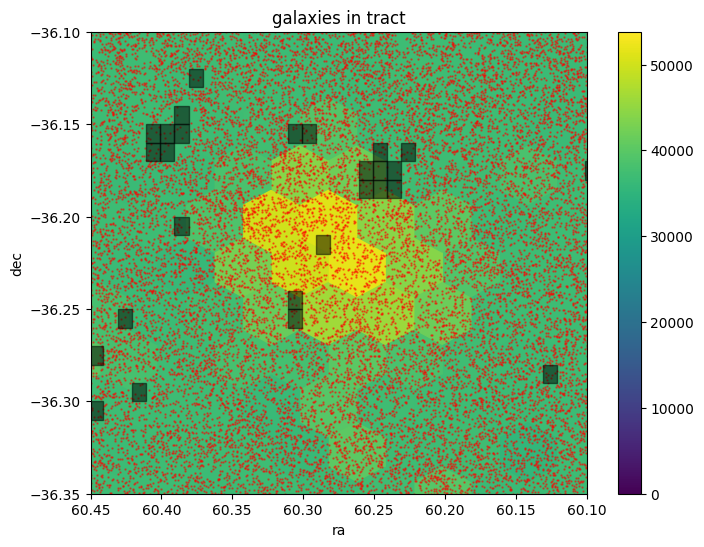

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hexbin(ra[val_min:val_max], dec[val_min:val_max], C=mask[vpix[val_min:val_max]], gridsize = 300)
plt.colorbar()
plt.scatter(gal['ra'],gal['dec'], s=0.5, alpha = .5, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('galaxies in tract')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = .5)
    ax.add_patch(rectangle)
plt.xlim([60.45,60.1])
plt.ylim([-36.35,-36.10])
#plt.legend()


(-36.35, -36.1)

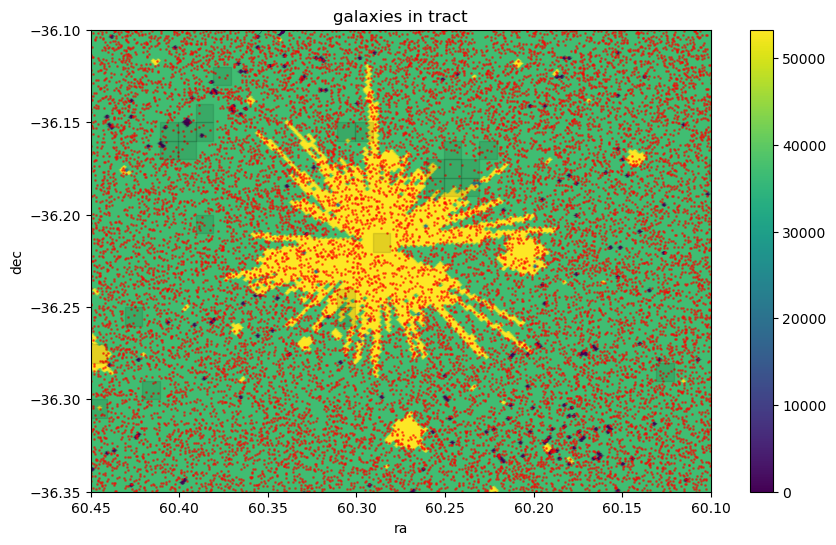

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.hexbin(ra[val_min:val_max], dec[val_min:val_max], C=mask[vpix[val_min:val_max]], gridsize = 2500, vmin=24.9, vmax=25.1)
plt.scatter(ra_v, dec_v, c=vpix_b)#, vmin=24.9, vmax=25.1)
plt.colorbar()
plt.scatter(gal['ra'],gal['dec'], s=1, alpha = .5, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('galaxies in tract')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = .1)
    ax.add_patch(rectangle)
plt.xlim([60.45,60.1])
plt.ylim([-36.35,-36.10])
#plt.legend()


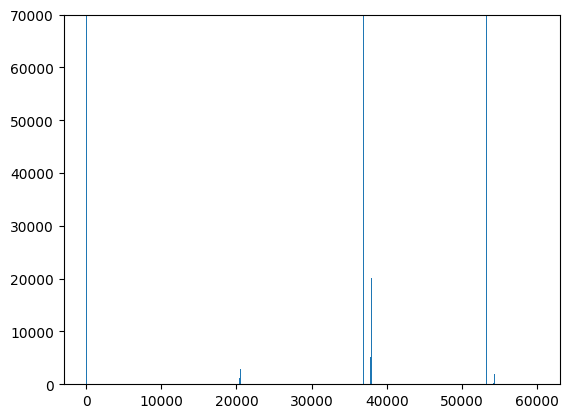

In [23]:
plt.hist(mask[vpix[val_min:val_max]], bins = np.linspace(0,60000, 601))#, bins = np.linspace(22.2,26.2,401))
#plt.xlim([37000,40000])
plt.ylim([0,70000])
plt.show()

In [84]:
n, bins = np.histogram(mask[vpix[val_min:val_max]], bins = np.linspace(0,60000, 601))

In [85]:
bins

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
        7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
        8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
        8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
        9600.,  9700.,  9800.,  9900., 10000., 10100., 10200., 10300.,
       10400., 10500., 10600., 10700., 10800., 10900., 11000., 11100.,
      

In [86]:
len(bins)

601

In [97]:
xbins= []
for i in range(len(bins)-1):
    xbins.append((bins[i+1]+bins[i])/2)

In [98]:
len(xbins)

600

In [101]:
n_e = []
for i in range(len(xbins)):
    if n[i]>0:
        n_e.append(xbins[i])

In [103]:
n[n!=0]

array([ 151087,     135,    1145,    2945,      11, 8867859,  415846,
          5243,   20195,  533313,     188,    2033])

In [102]:
n_e

[50.0,
 5150.0,
 20450.0,
 20550.0,
 21550.0,
 36850.0,
 36950.0,
 37850.0,
 37950.0,
 53250.0,
 54250.0,
 54350.0]

In [24]:
sub_mask = mask[vpix[val_min:val_max]]

In [118]:
cut = 30000
cut1, cut2 = 0, 60000

In [112]:
c_mag = sub_mask[sub_mask<=cut]
ra_mag = ra[val_min:val_max][sub_mask<=cut]
dec_mag = dec[val_min:val_max][sub_mask<=cut]

In [119]:
c_mag = sub_mask[(sub_mask>=cut1)*(sub_mask<=cut2)]
ra_mag = ra[val_min:val_max][(sub_mask>=cut1)*(sub_mask<=cut2)]
dec_mag = dec[val_min:val_max][(sub_mask>=cut1)*(sub_mask<=cut2)]

(-36.35, -36.1)

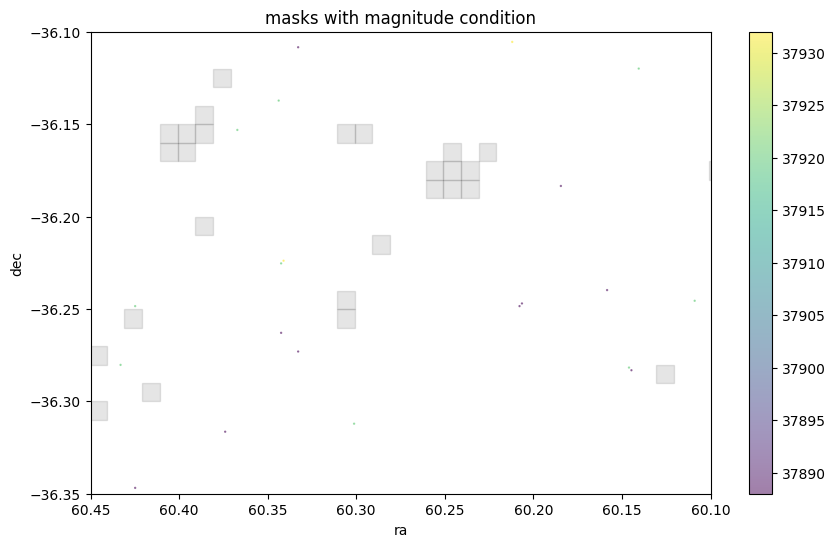

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.hexbin(ra[val_min:val_max], dec[val_min:val_max], C=mask[vpix[val_min:val_max]], gridsize = 2500, vmin=24.9, vmax=25.1)
plt.scatter(ra_mag, dec_mag, c=c_mag, s=.5, alpha = .5)
plt.colorbar()
#plt.scatter(gal_nextd['ra'],gal_nextd['dec'], s=1, alpha = 1, color = 'red')
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('masks with magnitude condition')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = .1)
    ax.add_patch(rectangle)
plt.xlim([60.45,60.1])
plt.ylim([-36.35,-36.10])
#plt.legend()


In [140]:
len(ra[val_min:val_max])

10000000

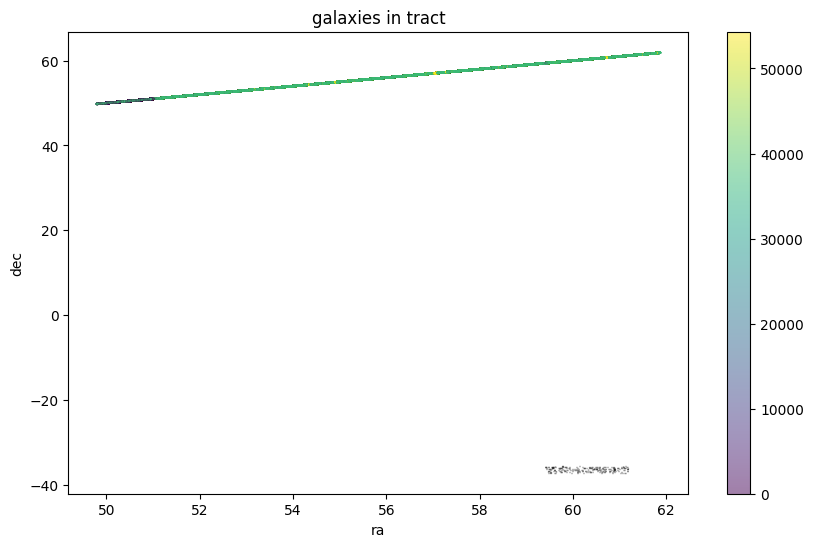

In [29]:
fig, ax = plt.subplots(figsize=(10,6))


#plt.scatter(gal['ra'],gal['dec'], s=1, alpha = .5, color = 'red')
plt.scatter(ra[val_min:val_max], ra[val_min:val_max], c=sub_mask, s=.5, alpha = .5)
plt.colorbar()
#plt.scatter(ra_mask, dec_mask, s=5, color = 'white')
#plt.scatter(max(ra_bins),max(dec_bins), color = 'black' )
plt.xlabel("ra")
plt.ylabel("dec")
plt.title('galaxies in tract')
#plt.xlim([60,60.5])
#plt.ylim([-36.4,-36])
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = .5)
    ax.add_patch(rectangle)
#plt.xlim([60.45,60.1])
#plt.ylim([-36.35,-36.10])
#plt.legend()

In [137]:
len(ra_mag)

10000000

In [138]:
len(sub_mask)

10000000

In [126]:
sub_mask

array([36896, 36896, 36896, ..., 36896, 36896, 36896], dtype=int32)

In [37]:
len(ra_box)

446268

In [14]:
hsp_map = hsp.HealSparseMap(nside_coverage=nside_sparse, healpix_map=mask)

ValueError: The sentinel must be set to an integer value with an integer healpix_map

In [12]:
ra_valid, dec_valid = mask.valid_pixels_pos(lonlat=True)
# Let's retrieve the values of the pixels at these locations. There's an alternative way to do this
hsp_map_values = mask.get_values_pos(ra_valid, dec_valid, lonlat=True)

# Another option to retrieve the values of the map can be instead the line below:
#hsp_map_values = hsp_map.get_values_pix(hsp_map.valid_pixels)

size = 1./60*hp.nside2resol(nside_sparse, arcmin=True) # Get the resolution of the pixel
print('Pixel resolution: %.2f deg' % (size))
# Let's take a look, approximating each pixel as Circles with radius = resolution/2
# We will draw circles 10 times larger than they should so we can see them in this map
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
# This visualization is not accurate but it helps
patches = [Circle((x_, y_), s_) for x_, y_, s_ in np.broadcast(ra_valid, dec_valid, 10*size/2)]
collection = PatchCollection(patches)
collection.set_array(np.asarray(hsp_map_values))
f, ax = plt.subplots(1,1)
ax.add_collection(collection)
ax.autoscale_view()
plt.sci(collection)
plt.colorbar(label='Pixel values')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]');

AttributeError: 'numpy.ndarray' object has no attribute 'valid_pixels_pos'

In [25]:
mask.metadata

{'XTENSION': 'BINTABLE',
 'BITPIX': 8,
 'NAXIS': 2,
 'NAXIS1': 8,
 'NAXIS2': 120,
 'PCOUNT': 73208653,
 'GCOUNT': 1,
 'TFIELDS': 1,
 'TTYPE1': 'COMPRESSED_DATA',
 'TFORM1': '1PB(798327)',
 'ZIMAGE': True,
 'ZTENSION': 'IMAGE',
 'ZBITPIX': -64,
 'ZNAXIS': 1,
 'ZNAXIS1': 125829120,
 'ZPCOUNT': 0,
 'ZGCOUNT': 1,
 'ZTILE1': 1048576,
 'ZCMPTYPE': 'GZIP_2',
 'ZNAME1': 'NOISEBIT',
 'ZVAL1': 0.0,
 'ZQUANTIZ': 'NONE',
 'EXTNAME': 'SPARSE',
 'PIXTYPE': 'HEALSPARSE',
 'NSIDE': 32768,
 'SENTINEL': -1.6375e+30}

In [27]:
mask.NAXIS2

AttributeError: 'HealSparseMap' object has no attribute 'NAXIS2'

In [11]:
mask.get_values_pos(60.40,-36.15)

36896

In [14]:
map_rec = mask[:10]

In [16]:
map_rec

array([-2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
       -2147483648, -2147483648, -2147483648, -2147483648, -2147483648],
      dtype=int32)

In [15]:
print(map_rec.valid_pixels)

AttributeError: 'numpy.ndarray' object has no attribute 'valid_pixels'

{'XTENSION': 'BINTABLE',
 'BITPIX': 8,
 'NAXIS': 2,
 'NAXIS1': 8,
 'NAXIS2': 120,
 'PCOUNT': 35858174,
 'GCOUNT': 1,
 'TFIELDS': 1,
 'TTYPE1': 'COMPRESSED_DATA',
 'TFORM1': '1PB(393580)',
 'ZIMAGE': True,
 'ZTENSION': 'IMAGE',
 'ZBITPIX': 32,
 'ZNAXIS': 1,
 'ZNAXIS1': 125829120,
 'ZPCOUNT': 0,
 'ZGCOUNT': 1,
 'ZTILE1': 1048576,
 'ZCMPTYPE': 'GZIP_2',
 'EXTNAME': 'SPARSE',
 'PIXTYPE': 'HEALSPARSE',
 'NSIDE': 32768,
 'SENTINEL': -2147483648}

In [21]:
mask.metadata['NAXIS2']

120

In [29]:
print(mask._sparse_map.dtype.fields)

None


In [31]:
print(exp._sparse_map.dtype.fields)

None


In [30]:
mask

HealSparseMap: nside_coverage = 32, nside_sparse = 32768, float64

In [ ]:
vpix, ra, dec = mask.valid_pixels_pos(return_pixels=True)
plt.hexbin(ra, dec, C=mask[vpix])
plt.colorbar()
plt.show()

In [4]:
print(mask.valid_pixels)

[8922726110 8922726111 8922726116 ... 9466587408 9466587409 9466587412]


In [6]:
ra, dec = mask.valid_pixels_pos(lonlat=True)
print(ra)
print(dec)

[71.40482652 71.40542723 71.40011631 ... 58.78234863 58.78372192
 58.78509521]
[-44.63203558 -44.63048821 -44.63667762 ... -26.95874306 -26.95743527
 -26.95612749]


In [7]:
len(ra)

94653318

In [8]:
len(dec)

94653318

In [9]:
len(mask.valid_pixels)

94653318

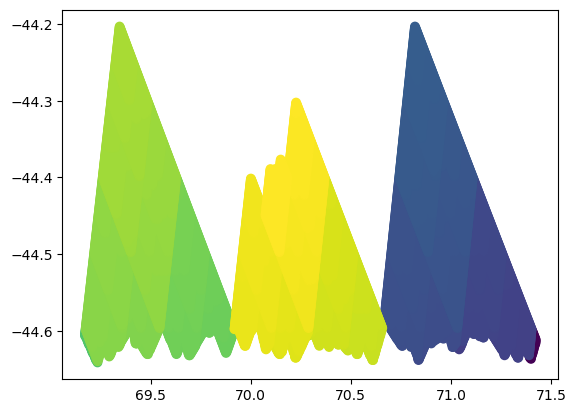

In [13]:
plt.scatter(ra[:100000], dec[:100000], c= mask.valid_pixels[:100000])

In [14]:
hpmap128 = mask[:10000].generate_healpix_map(nside=128, reduction='mean')

AttributeError: 'numpy.ndarray' object has no attribute 'generate_healpix_map'